In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Reading data from a csv file and displaying the first 5 records.

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Dropping some columns by name, axis 1 refers to vertical axis(columns), inplaces replaces the old dataframe.

In [3]:
df.drop(['Formatted Date', 'Summary','Daily Summary', 'Loud Cover'], axis=1, inplace=True)

Checking for na values.

In [4]:
df.isna().sum()

Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

Checking for na values.

In [5]:
df['Precip Type'].fillna('unknown', inplace=True)

Checking unique precip values.

In [6]:
df['Precip Type'].unique()

array(['rain', 'snow', 'unknown'], dtype=object)

## **Visualization**

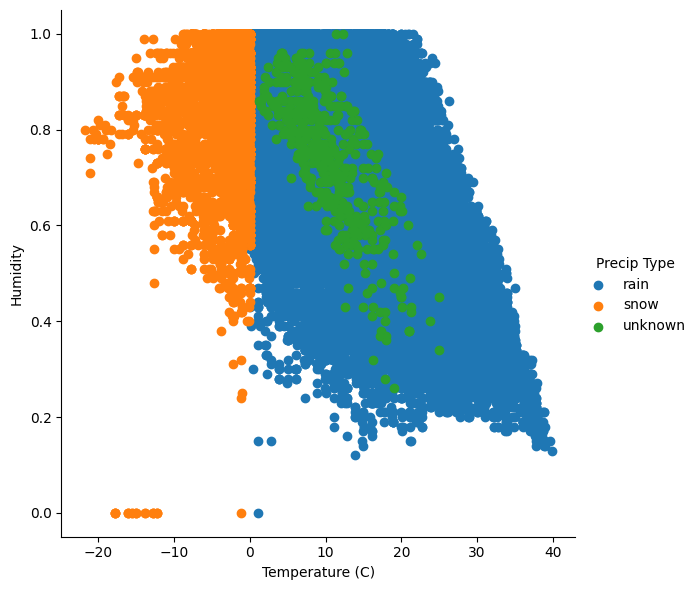

In [7]:
sns.FacetGrid(df, hue="Precip Type", height=6).map(plt.scatter, "Temperature (C)", "Humidity").add_legend()
plt.show()

Replacing uknown labels with rain.

In [8]:
df['Precip Type'].replace('unknown','rain',inplace=True)

Counting each label type.

In [9]:
df['Precip Type'].value_counts()

rain    85741
snow    10712
Name: Precip Type, dtype: int64

## **More visualization**

<AxesSubplot: xlabel='Temperature (C)', ylabel='Count'>

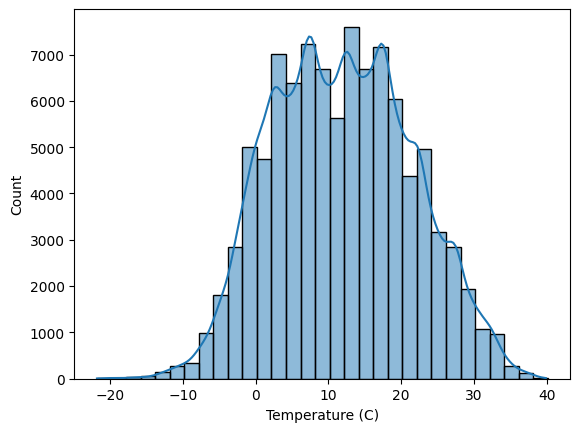

In [10]:
sns.histplot(data=df, x="Temperature (C)", kde=True,binwidth=2)

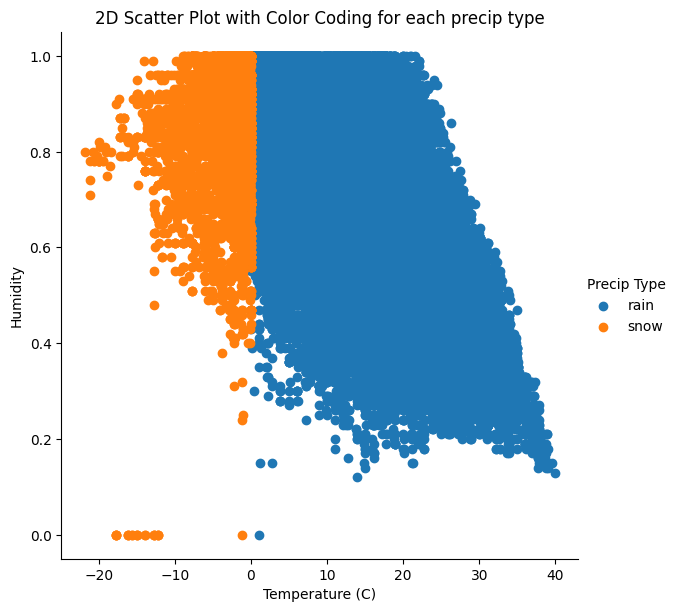

In [11]:
sns.FacetGrid(df, hue="Precip Type", height=6).map(plt.scatter, "Temperature (C)", "Humidity").add_legend()
plt.title("2D Scatter Plot with Color Coding for each precip type")
plt.show()

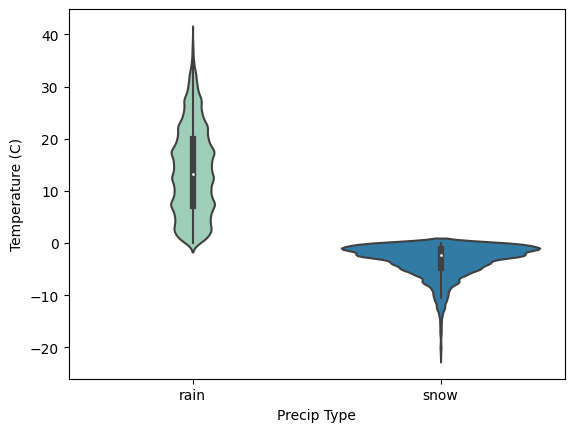

In [12]:
sns.violinplot(x="Precip Type", y="Temperature (C)", data=df, palette="YlGnBu");

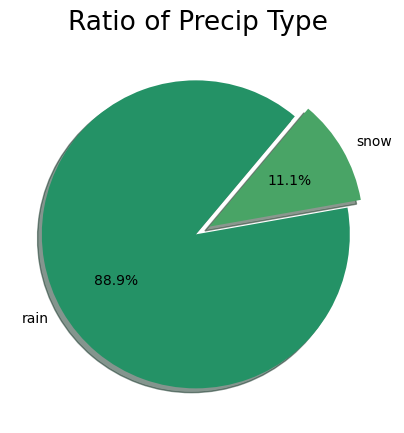

In [13]:
rain = len(df[df['Precip Type'] == 'rain'])
snow = len(df[df['Precip Type'] == 'snow'])

labels = 'rain','snow'
sizes = [rain,snow]
plt.figure(figsize=(5,5))

# Plot
plt.pie(sizes, explode=(0.05, 0.05), labels=labels, colors=sns.color_palette("summer"),
autopct='%1.1f%%', shadow=True, startangle=50)
sns.set_context("paper", font_scale=2)
plt.title('Ratio of Precip Type ', fontsize=19)
plt.show()

In [ ]:
sns.pairplot(df,hue='Precip Type')

Encoding labels into 0 and 1 using label encoder.

In [14]:
le = LabelEncoder()
df['Precip Type'] = le.fit_transform(df['Precip Type'])

Inspecting the index of the labels.

In [15]:
le.classes_

array(['rain', 'snow'], dtype=object)

Correlation Matrix

In [16]:
df.corr()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Precip Type,1.000000,-0.562620,-0.565207,0.232113,-0.067928,-0.041984,-0.312875,0.009008
Temperature (C),-0.562620,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),-0.565207,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,0.232113,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),-0.067928,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),-0.041984,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),-0.312875,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),0.009008,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


Dropping columns with low correlation to the labels.

In [17]:
df.drop(['Pressure (millibars)','Wind Speed (km/h)','Wind Bearing (degrees)'], axis=1, inplace=True)

Splitting the data into train and test with a 7:3 ratio.

In [18]:
rain = df[df['Precip Type'] == 0]
snow = df[df['Precip Type'] == 1]

train_rain, test_rain = train_test_split(rain, test_size=0.3)
train_snow, test_snow = train_test_split(snow, test_size=0.3)

train = pd.concat([train_rain, train_snow])
test = pd.concat([test_rain, test_snow])

Shuffling and seperating features from labels.

In [19]:
# Shuffle the data
train = train.sample(frac=1)
test = test.sample(frac=1)

# Split the data into X and y
X_train = train.drop(['Precip Type'], axis=1)
y_train = train['Precip Type']
X_test = test.drop(['Precip Type'], axis=1)
y_test = test['Precip Type']

## **Models**

### **K-Nearest-Neighbours (KNN)**
A k-nearest-neighbor algorithm, often abbreviated k-nn, is an approach to data classification that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.

The k-nearest-neighbor is an example of a "lazy learner" algorithm, meaning that it does not build a model using the training set until a query of the data set is performed.

In [20]:
knn = KNeighborsClassifier()

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
knnScore = knn.score(X_test, y_test)
knnPredict = knn.predict(X_test)

### **Support Vector Machine (SVM)**
A support vector machine (SVM) is machine learning algorithm that analyzes data for classification and regression analysis. SVM is a supervised learning method that looks at data and sorts it into one of two categories. An SVM outputs a map of the sorted data with the margins between the two as far apart as possible. SVMs are used in text categorization, image classification, handwriting recognition and in the sciences.

A support vector machine is also known as a support vector network (SVN)

In [23]:
svm = LinearSVC()

In [24]:
svm.fit(X_train, y_train)

/home/nourgaser/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [25]:
svmScore = svm.score(X_test, y_test)
svmPredict = svm.predict(X_test)

### **Naive Bayes (NB)**
Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features. Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.

Naïve Bayes models are also known as simple Bayes or independent Bayes. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning.

In [26]:
nb = MultinomialNB()

In [27]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)

In [28]:
nb.fit(X_train_scaled, y_train)

MultinomialNB()

In [29]:
nbScore = nb.score(X_test_scaled, y_test)
nbPredict = nb.predict(X_test_scaled)

### **Linear Regression**
is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables they are considering, and the number of independent variables getting used. There are many names for a regression’s dependent variable.  It may be called an outcome variable, criterion variable, endogenous variable, or regressand.  The independent variables can be called exogenous variables, predictor variables, or regressors.

In [30]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)
print("alpha = ",lr.coef_[0])
print("beta = ",lr.intercept_)
print("\nCalculating some regression quality metrics")
lrPredict = lr.predict(X_test)
lrScore = lr.score(X_test,y_test)
print("MSE = ",mean_squared_error(y_test, lrPredict))
print("accuracy = ",lrScore)

alpha =  -0.016558680260711924
beta =  0.7364123900001536

Calculating some regression quality metrics
MSE =  0.06334130196032038
accuracy =  0.3584559162233688


### Comparing the accuracy of the models.

In [31]:
print(f'knn accuracy: {knnScore.round(decimals=4)*100}%')
print(f'svm accuracy: {svmScore.round(decimals=4)*100}%')
print(f'nb accuracy: {nbScore.round(decimals=4)*100}%')
print(f'lr accuracy: {lrScore.round(decimals=4)*100}%')

knn accuracy: 99.45%
svm accuracy: 99.92%
nb accuracy: 88.89%
lr accuracy: 35.85%


### **Confusion Matrix of each model**

In [32]:
knn_cm = confusion_matrix(y_test, knnPredict)
svm_cm = confusion_matrix(y_test, svmPredict)
nb_cm = confusion_matrix(y_test, nbPredict)

In [33]:
knn_cm_display = ConfusionMatrixDisplay(knn_cm, display_labels=le.classes_)
svm_cm_display = ConfusionMatrixDisplay(svm_cm, display_labels=le.classes_)
nb_cm_display = ConfusionMatrixDisplay(nb_cm, display_labels=le.classes_)

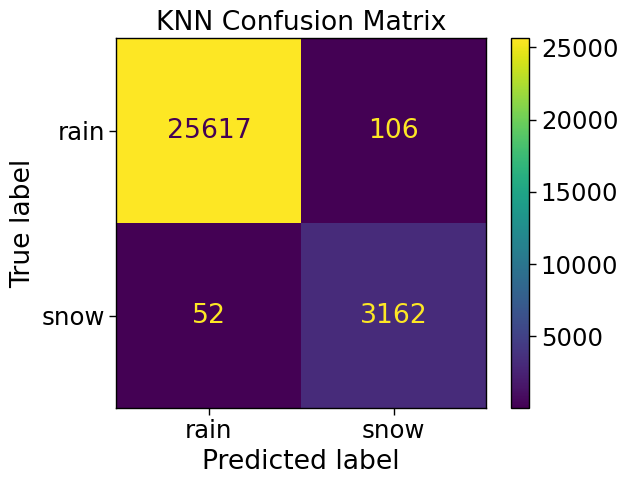

<Figure size 640x480 with 0 Axes>

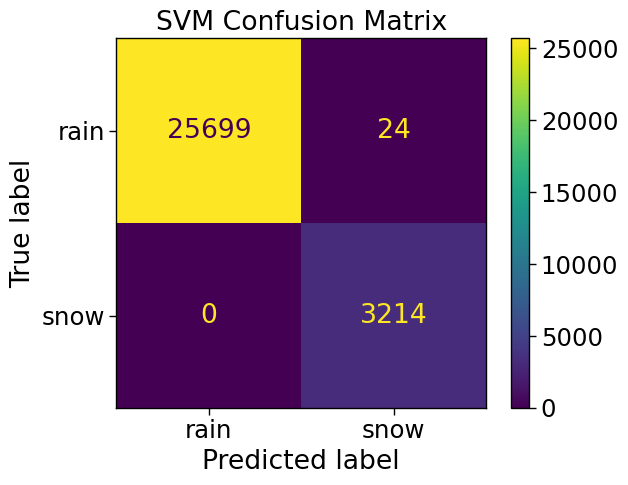

<Figure size 640x480 with 0 Axes>

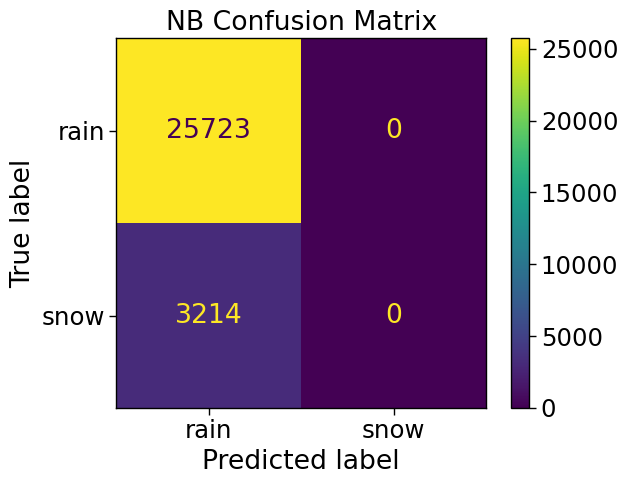

In [34]:
knn_cm_display.plot()
plt.title('KNN Confusion Matrix')
plt.figure()
svm_cm_display.plot()
plt.title('SVM Confusion Matrix')
plt.figure()
nb_cm_display.plot()
plt.title('NB Confusion Matrix')
plt.show()

Function to test a model.

In [35]:
def makePrediction(list):
    t = pd.DataFrame({'Temperature (C)':[list[0]],'Apparent Temperature (C)':[list[1]],'Humidity':[list[2]],'Visibility (km)':[list[3]]})
    y = knn.predict(t)[0]
    if y == 0:
        return 'Get ready for a free shower!'
    else:
        return 'Better bring your snow boots!'

### **Q1) Is SVM better than Naive Bayes?**
As it can be seen by the accuracy and the confusion matrix, yes,SVM is better than Naive Bayes on this dataset. Naive Bayes in general is more suitable for textual data.
### **Q2) Is SVM faster than KNN?**
SVM is slightly faster than KNN in our case, which is reasonable considering KNN is a lazy learner. However, with a larger data or more features, SVM slowsdown.
### **Q3) Explain the difference between label encoding, one hot encoding and normalization with example**
1. **Label Encoding**: If we have a list of labels, i.e., rain and snow, label encoding would count the number of classes and enumerate the classes accordingly, so rain would be replaced with 0 and snow would be replaced with 1 when using the encoder on a dataset.
1. **One Hot Encoding**: If we have a list of labels, i.e., rain and snow, one hot encoding would count the number of classes, and represent each label as a vectorized version of all classes, putting 1 in the class position and 0 in all other positions. So in our example rain would be [1,0] and snow would be [0,1].
1. **Normalization**: The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model. Let's say we have a dataset having two attributes, i.e., age and salary. Where the age ranges from 0 to 80 years old, and the income varies from 0 to 75,000 dollars or more. Income is assumed to be 1,000 times that of age. As a result, the ranges of these two attributes are much different from one another. normalization would fit them both in the same range, typically from 0 to 1.